In [1]:
import os

def print_folder_structure(root_folder):
    for dirpath, dirnames, filenames in os.walk(root_folder):
        level = dirpath.replace(root_folder, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f"{indent}{os.path.basename(dirpath)}/")
        subindent = ' ' * 2 * (level + 1)
        for filename in filenames:
            print(f"{subindent}{filename}")

print_folder_structure('/kaggle/input/sdg-scratch')


sdg-scratch/
  __results__.html
  __notebook__.ipynb
  __output__.json
  custom.css
  datasets/
    good_images_64x64.zip
  stylegan2-ada-pytorch/
    legacy.py
    train.py
    Dockerfile
    .gitignore
    README.md
    dataset_tool.py
    LICENSE.txt
    docker_run.sh
    calc_metrics.py
    generate.py
    projector.py
    style_mixing.py
    .github/
      ISSUE_TEMPLATE/
        bug_report.md
    training/
      loss.py
      networks.py
      augment.py
      dataset.py
      __init__.py
      training_loop.py
      __pycache__/
        training_loop.cpython-311.pyc
        __init__.cpython-311.pyc
        augment.cpython-311.pyc
        loss.cpython-311.pyc
        networks.cpython-311.pyc
        dataset.cpython-311.pyc
    metrics/
      metric_utils.py
      metric_main.py
      perceptual_path_length.py
      kernel_inception_distance.py
      inception_score.py
      frechet_inception_distance.py
      __init__.py
      precision_recall.py
      __pycache__/
        __init

In [2]:
# --- CONFIGURATION ---
# We point directly to the 1000th tick snapshot
model_path = "/kaggle/input/sdg-scratch/training-runs/00000-good_images_64x64-auto1-kimg1000/network-snapshot-001000.pkl"

# Output folder for your 500 images
output_dir = "/kaggle/working/final_500_images"
# ---------------------

# Generate
# --seeds=0-499 creates exactly 500 unique images
# --trunc=0.7 keeps images realistic (higher = weirder, lower = more similar)
!python /kaggle/input/sdg-scratch/stylegan2-ada-pytorch/generate.py \
    --outdir={output_dir} \
    --trunc=0.7 \
    --seeds=0-499 \
    --network={model_path}

print(f"Success! 500 images generated in {output_dir}")

Loading networks from "/kaggle/input/sdg-scratch/training-runs/00000-good_images_64x64-auto1-kimg1000/network-snapshot-001000.pkl"...
Generating image for seed 0 (0/500) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
/kaggle/input/sdg-scratch/stylegan2-ada-pytorch/generate.py:121: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  PIL.Image.fromarray

Found 500 images. Displaying the first 16...


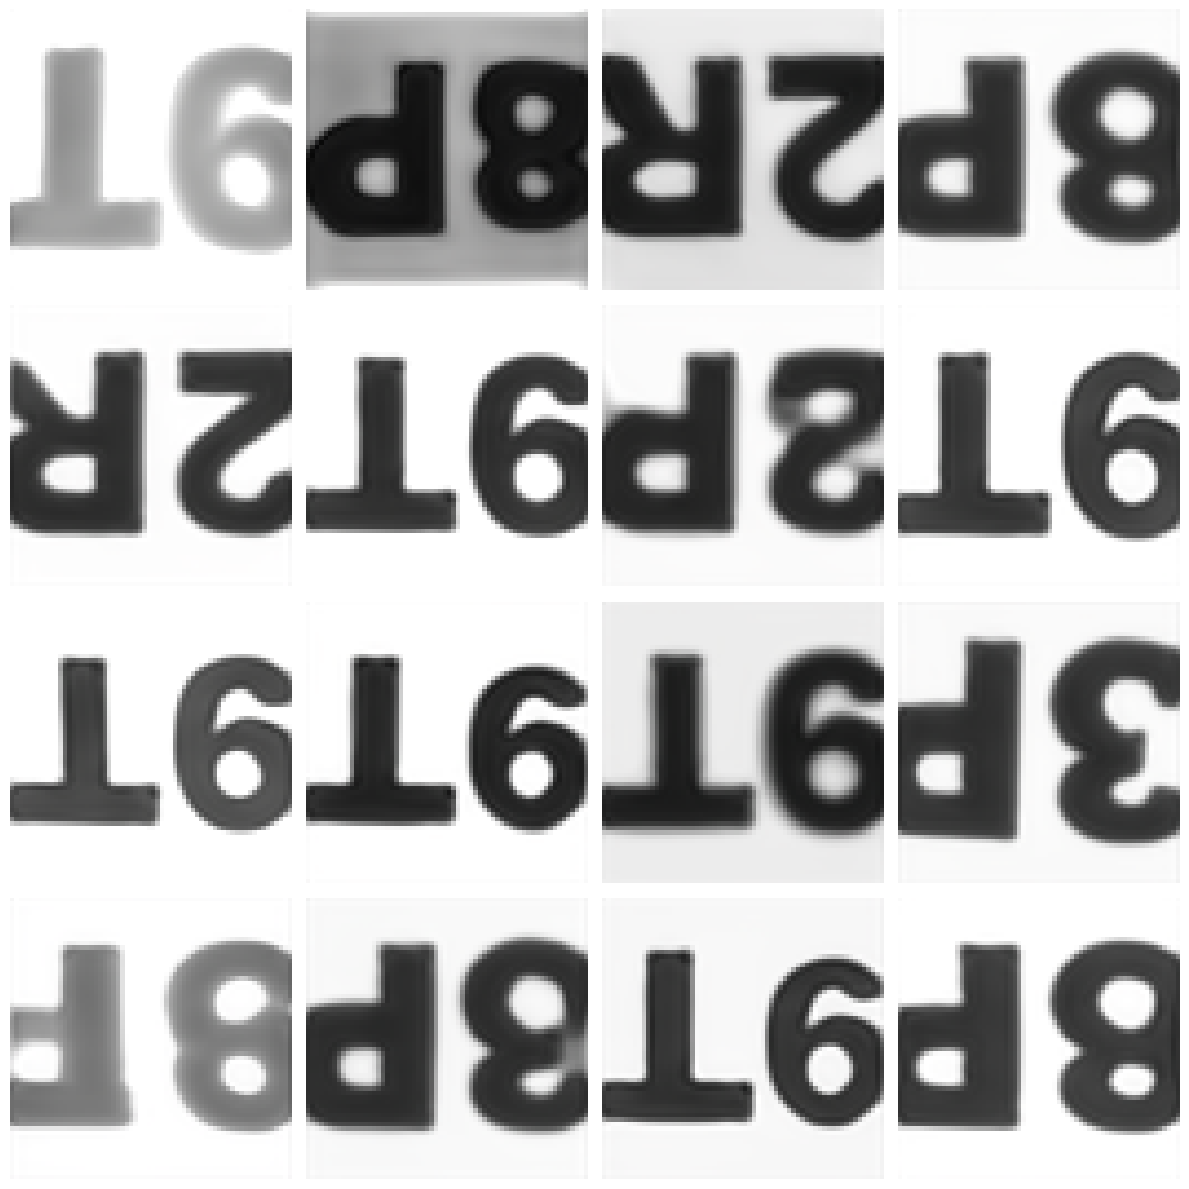

In [3]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
import math

# Define the folder where you generated the images
output_folder = "/kaggle/working/final_500_images"

# Get all image paths
image_paths = sorted(glob.glob(os.path.join(output_folder, "*.png")))

# Check if images exist
if not image_paths:
    print(f"No images found in {output_folder}. Did the generation script run successfully?")
else:
    print(f"Found {len(image_paths)} images. Displaying the first 16...")

    # Configuration for the grid
    num_images_to_show = 16
    grid_size = int(math.sqrt(num_images_to_show)) # 4x4 grid
    
    # Create the plot
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(image_paths):
            img = Image.open(image_paths[i])
            ax.imshow(img)
            ax.axis('off') # Hide axes ticks
        else:
            ax.axis('off') # Hide empty subplots

    plt.tight_layout()
    plt.show()